In [10]:
# !pip install scipy as sns
import random 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from numpy import random

## Question1:
### (a) Exponential random variable with mean equal to µ. 

Points= [0.13843403 0.03941748 0.1285501  ... 0.16014923 0.15750914 0.12500014]
Given Mean =  0.2 
Calculated Mean= 0.2002167504403591
Inbuilt mean =  0.20238542856186936


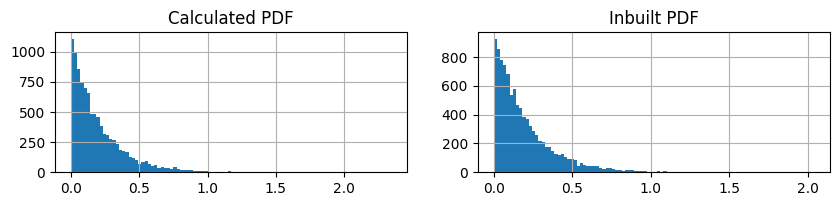

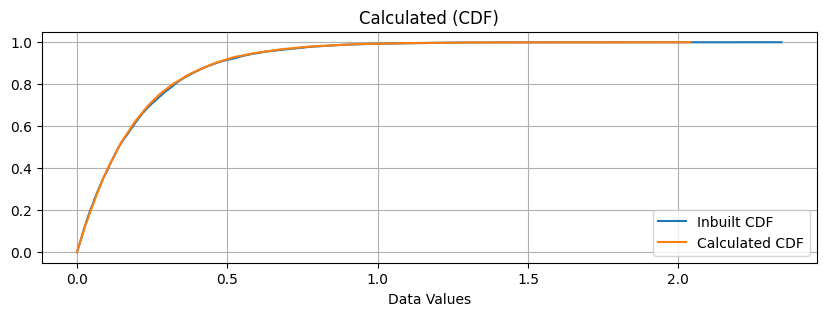

In [11]:
y_inbuilt = []
y=[]
i=0
mean=0.2
while i<10000:
    u=random.random()
    inv=(-np.log(1-u))*mean
    if inv!=np.nan:
        y.append(inv)
        y_inbuilt.append(random.exponential(0.2))
        i=i+1
y_pts = np.array(y)
print("Points=",y_pts)
print("Given Mean = ",mean,"\nCalculated Mean=",np.mean(y_pts))
print("Inbuilt mean = ",np.mean(y_inbuilt))

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.title("Calculated PDF")
plt.grid()
plt.hist(y_inbuilt,bins=100);

plt.subplot(2,2,2)
plt.title("Inbuilt PDF")
plt.grid()
plt.hist(y,bins=100);


#CDF:
plt.figure(figsize=(10,3))


sorted_data = np.sort(y_inbuilt)
unique_data = np.unique(sorted_data)
cdf = np.arange(1, len(unique_data) + 1) / len(sorted_data)
plt.plot(unique_data, cdf)

sorted_data = np.sort(y_pts)
unique_data = np.unique(sorted_data)
cdf = np.arange(1, len(unique_data) + 1) / len(sorted_data)
plt.plot(unique_data, cdf)


plt.xlabel('Data Values')
plt.title('Calculated (CDF)')
plt.legend(["Inbuilt CDF","Calculated CDF"])
plt.grid()

### (b) Rayleigh random variable with mean equal to 2µ.


Points= [0.38740081 0.13337009 0.83565099 ... 0.11711395 0.28506764 0.38169009]
Given Mean =  0.4 
Calculated Mean= 0.40192604824947636
Inbuilt mean =  0.39607147521444813


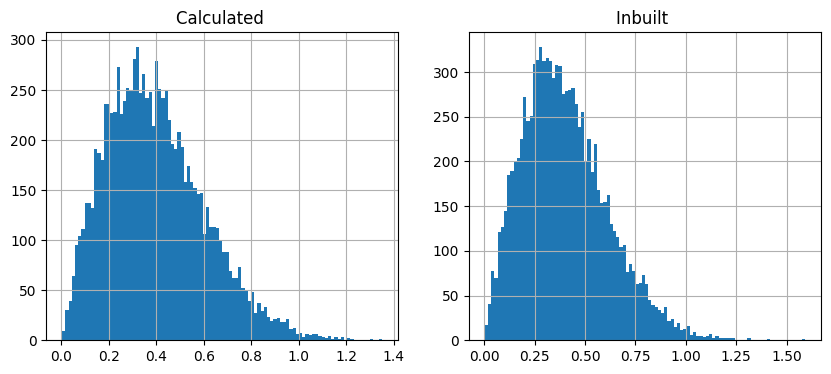

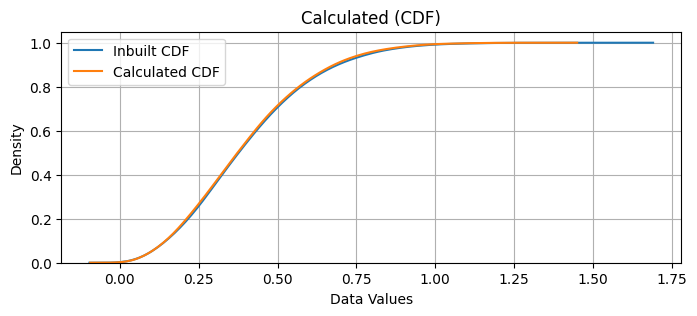

In [12]:
y_inbuilt = []
y=[]
i=0

mean=2*0.2
while i<10000:
    u=random.random()
    inv= mean*(np.sqrt(2/np.pi))*np.sqrt(-2*np.log(1-u))
#     if inv!=np.nan:
    y.append(inv)
    y_inbuilt.append(random.rayleigh(mean*(np.sqrt(2/np.pi))))
    i=i+1
    
y_pts = np.array(y)
print("Points=",y_pts)
print("Given Mean = ",mean,"\nCalculated Mean=",np.mean(y_pts))
print("Inbuilt mean = ",np.mean(y_inbuilt))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Calculated ")
plt.grid()
plt.hist(y_inbuilt,bins=100);

plt.subplot(1,2,2)
plt.title("Inbuilt ")
plt.grid()
plt.hist(y,bins=100);

plt.figure(figsize=(8,3))
sns.kdeplot(y_pts, cumulative=True,label="Calculated")
sns.kdeplot(y_inbuilt, cumulative=True,label="Inbuilt")
plt.xlabel('Data Values')
plt.title('Calculated (CDF)')
plt.legend(["Inbuilt CDF","Calculated CDF"])
plt.grid()
plt.show()

## Generate 10000 samples of a RV following a Gaussian distribution with mean µ and variance 3µ, where µ = 2/10=0.2
### (a) Central limit theorem

Mean of samples obt by CLT =  0.20431004708861478
Mean of inbuilt Gaussian samples =  0.19084647268989607
Variance of samples obt by CLT=  0.7723628481978233
Variance of samples obt by CLT=  0.775021677674265


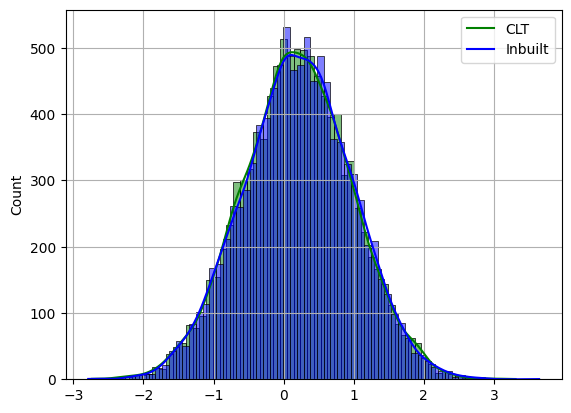

In [13]:
Gaussian_samples=[]
Gaussian_inbuilt=[]
mean=0.2
for i in range(10000):
    uniform_samples=random.random(1000)
    gaussian_sample = np.sqrt(3*mean)*((np.sum(uniform_samples)-(len(uniform_samples)/2))/(np.sqrt(1000/12)))+mean
    Gaussian_samples.append(gaussian_sample)
    Gaussian_inbuilt.append(np.sqrt(3*mean)*random.randn()+mean)
    
Gaussian_samples=np.array(Gaussian_samples)
# print(Gaussian_samples)
print("Mean of samples obt by CLT = ",np.mean(Gaussian_samples))
print("Mean of inbuilt Gaussian samples = ",np.mean(Gaussian_inbuilt))
print("Variance of samples obt by CLT= ",np.std(Gaussian_samples))
print("Variance of samples obt by CLT= ",np.std(Gaussian_inbuilt))


plt.grid()
# plt.hist(Gaussian_samples,bins=80);
sns.histplot(x=Gaussian_inbuilt,color='green',fill=True,kde=True);
sns.histplot(x=Gaussian_samples,color='blue',fill=True,kde=True);

plt.legend(['CLT','Inbuilt'])

### (b)  Box-Muller method

Mean using Box-Muller =  0.19993310288257868 Variance using Inbuilt =  0.7846581045779546
Mean using Inbuilt =  0.20223906324396895 Variance using Inbuilt =  0.7590143130186039


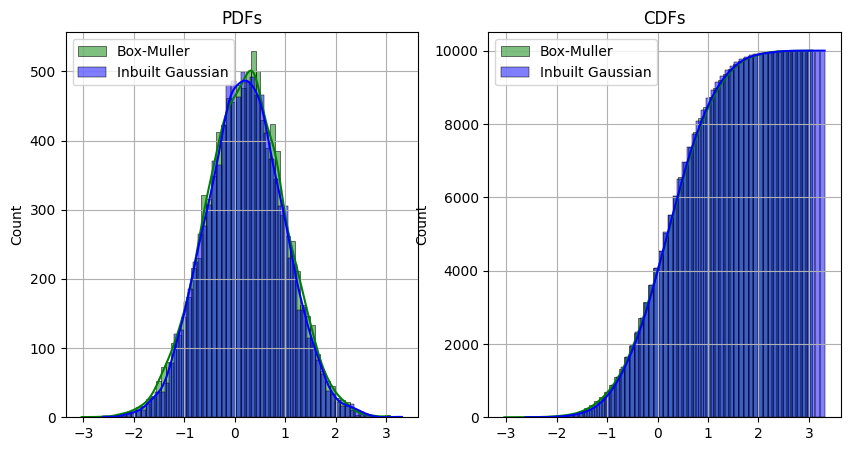

In [14]:
box_muller_values=[]
gaussian=[]
for i in range(10000):
    U1=random.random()
    U2=random.random()
    box_muller_values.append(np.sqrt(-2*np.log(U1))*(np.cos(2*np.pi*U2)))
    gaussian.append(np.sqrt(3*mean)*random.normal()+ mean)

box_muller_values = np.array(box_muller_values)
box_muller_samples = np.sqrt(3*mean)*box_muller_values + mean

print("Mean using Box-Muller = ",np.mean(box_muller_samples),"Variance using Inbuilt = ",np.std(box_muller_samples))
print("Mean using Inbuilt = ",np.mean(gaussian),"Variance using Inbuilt = ",np.std(gaussian))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(box_muller_samples, label='Box-Muller',color="green",kde=True)
sns.histplot(gaussian, label='Inbuilt Gaussian',color="blue",kde=True)
plt.grid()
# plt.xlabel('Value')
# plt.ylabel('Density')
plt.title("PDFs")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(box_muller_samples, label='Box-Muller',color = "green",kde=True,cumulative=True)
sns.histplot(gaussian, label='Inbuilt Gaussian',kde=True,color="blue" ,cumulative=True)
plt.title("CDFs")
plt.grid()
plt.legend()

# Show the plot
plt.show()

### Q3] Consider an LTI system with the impulse response h(t) = e^-t for t ≥ 0 and h(t) = 0, otherwise.Construct your own WSS random processes X1(t) and X2(t). Write code to provide them as inputs to the LTI system and obtain the outputs Y1(t) and Y2(t). Write code to prove that the outputs are also WSS.


#### https://www.youtube.com/watch?v=Y03LVHWc6rE Convolution

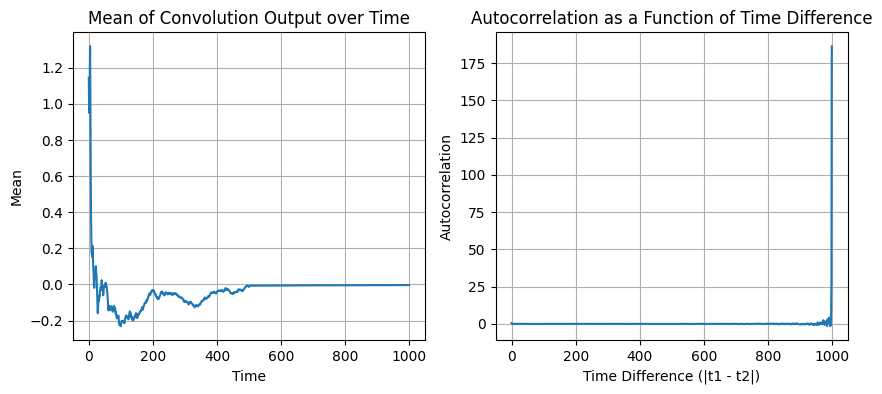

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 
n_samples = 1000  
mean = 0
std_deviation = 1
a = [1, -0.5, 0.2]  
def h(t):
    return np.exp(-t) if t >= 0 else 0

white_noise = np.random.normal(mean, std_deviation, n_samples)

# Discrete-time convolution to get the output
output = np.convolve(white_noise, [h(t) for t in range(n_samples)], 'same')

# Calculate the mean at different time stamps
time_stamps = np.arange(0, n_samples)
means = [np.mean(output[:t + 1]) for t in time_stamps]

# Plot the means and autocorrelation over time
plt.figure(figsize=(10, 4))

# Plot the mean
plt.subplot(1, 2, 1)
plt.plot(time_stamps, means)
plt.title('Mean of Convolution Output over Time')
plt.xlabel('Time')
plt.ylabel('Mean')
plt.grid(True)

time_stamps = np.arange(0, n_samples)
autocorrelations = []

for lag in range(n_samples):
    autocorr = np.correlate(output, np.roll(output, lag), mode='valid') / (n_samples - lag)
    autocorrelations.append(autocorr[0])

plt.subplot(1,2,2)
plt.plot(np.arange(0, n_samples), autocorrelations)
plt.title('Autocorrelation as a Function of Time Difference')
plt.xlabel('Time Difference (|t1 - t2|)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


(100,) 100
MAX mean=  0.0014114902697027502 MIN mean=  0.0010593992765549375
8.90796621080007 4.911373440361229


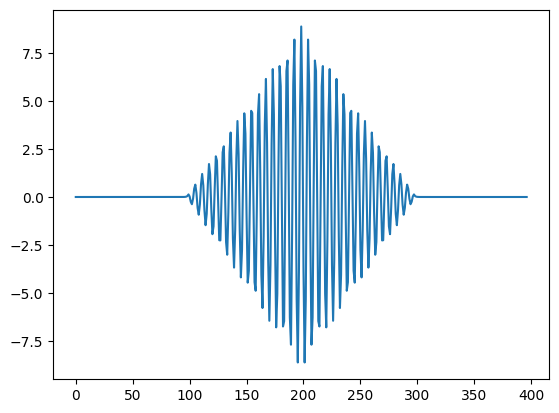

In [16]:
U = np.random.random(100)
t = np.linspace(0,100,num = 100)
# t_dash = np.linspace(0,100,num=20)
def h(T):
    time_stamps = []
    for t in T:
        if t>0:
            time_stamps.append(np.exp(-t))
        else:
            time_stamps.append(0)
    return time_stamps
X=[]
for i in t:
    x = np.cos(U+i)
    X.append(x)
X = np.array(X)
X = X.T

Y1=[]
print(X[0].shape,len(h(t)))
for i in range(X.shape[1]):
    y1 = np.convolve(X[i],h(t),mode="full")
#     print(y1)
#     print(y1.shape)
    Y1.append(y1)
mean_list=[]
Y1 = np.array(Y1)
for i in range(Y1.shape[0]):
    mean_list.append(np.mean(Y1[i]))
mean_list = np.array(mean_list)
print("MAX mean= ",np.max(mean_list),"MIN mean= ",np.min(mean_list))

autocorrelation_list = []
for i in range(Y1.shape[0]):
    for j in range(i+1,Y1.shape[0]):
        autocorrelation_list.append(np.correlate(Y1[i],Y1[j]))
        
autocorrelation_arr = np.array(autocorrelation_list)
print(np.max(autocorrelation_arr),np.min(autocorrelation_arr))
autocorrelation_matrix = np.zeros((Y1.shape[0], Y1.shape[0]))

for i in range(Y1.shape[0]):
    for j in range(Y1.shape[0]):
        autocorrelation = np.correlate(Y1[i], Y1[j], mode='full')
        autocorrelation_matrix[i, j] = autocorrelation[len(autocorrelation) // 2]  # Take the center value
plt.plot(autocorrelation)


(100,) 100
MAX mean=  0.0023332030696038603 MIN mean=  0.0009232427377522702
30.27120438361579 5.6904851999012465


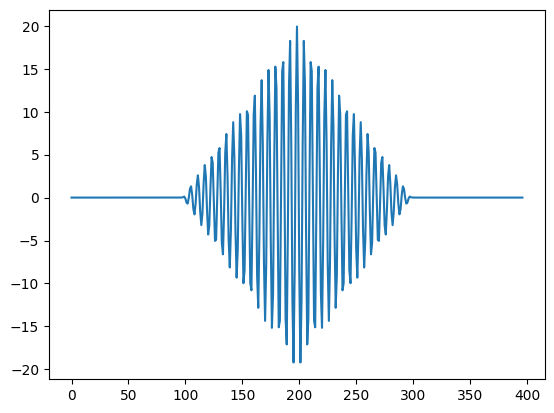

In [17]:
A = np.random.random(100)
B = np.random.random(100)
t = np.linspace(0,100,num = 100)
# t_dash = np.linspace(0,100,num=20)
def h(T):
    time_stamps = []
    for t in T:
        if t>0:
            time_stamps.append(np.exp(-t))
        else:
            time_stamps.append(0)
    return time_stamps
X2=[]
for i in t:
    x = np.cos(A+i)+np.sin(B+i)
    X2.append(x)
X2 = np.array(X2)
X2 = X2.T

Y1=[]
print(X2[0].shape,len(h(t)))
for i in range(X2.shape[1]):
    y1 = np.convolve(X2[i],h(t),mode="full")
#     print(y1)
#     print(y1.shape)
    Y1.append(y1)
mean_list=[]
Y1 = np.array(Y1)
for i in range(Y1.shape[0]):
    mean_list.append(np.mean(Y1[i]))
mean_list = np.array(mean_list)
print("MAX mean= ",np.max(mean_list),"MIN mean= ",np.min(mean_list))

autocorrelation_list = []
for i in range(Y1.shape[0]):
    for j in range(i+1,Y1.shape[0]):
        autocorrelation_list.append(np.correlate(Y1[i],Y1[j]))
        
autocorrelation_arr = np.array(autocorrelation_list)
print(np.max(autocorrelation_arr),np.min(autocorrelation_arr))
autocorrelation_matrix = np.zeros((Y1.shape[0], Y1.shape[0]))

for i in range(Y1.shape[0]):
    for j in range(Y1.shape[0]):
        autocorrelation = np.correlate(Y1[i], Y1[j], mode='full')
        autocorrelation_matrix[i, j] = autocorrelation[len(autocorrelation) // 2]  # Take the center value
plt.plot(autocorrelation)


### Q4 (a)The Amazing Spider-Man: Green Goblin, an arch nemesis of Spider-Man is located at a corner of a cubical shaped building (say (0,0,0)) and is distracted from the world. SpiderMan wants to catch him but is located at the opposite corner (say (1,1,1)). To conceal himself, Spider-Man decides to only move along the edges of the cubical shaped building in any direction (x,y,z) with equal probability 1/3. On an average, how many steps will Spider-Man need to get to Green Goblin?



#### Using equations source: https://stats.stackexchange.com/questions/139384/random-walk-on-the-edges-of-a-cube

In [19]:
P = np.array([
    [0,1,0,0],
    [1/3,0,2/3,0],
    [0,2/3,0,1/3],
    [0,0,0,1]
]) #Transition Probability Matrix

Q = np.array([[0,1,0],
            [1/3,0,2/3],
            [0,2/3,0]])

I = np.identity(3)

t=np.linalg.inv((I-Q))
print("No of steps required = ",np.sum(t[0]))



No of steps required =  9.999999999999995


#### Applying Random Walks multiple times then averaging the number of steps  

In [20]:
S3=np.array([0,1/3,0,1/3,0,1/3,0,0])
S2=np.array([1/3,0,1/3,0,0,0,1/3,0])
S1=np.array([0,1/3,0,1/3,0,0,0,1/3])

state_transitions = {
                        0:S3,
                        1:S2,
                        2:S1,
                        3:S2,
                        4:S1,
                        5:S2,
                        6:S1,
                        7:[0,0,0,0,0,0,0,1]
}
num_random_walks=10000
num_steps = 0
for i in range(num_random_walks):
    start=0
    
    prev_state = np.random.choice([0,1,2,3,4,5,6,7],p=state_transitions[start])
    steps=1
    while True:
        next_state = np.random.choice([0,1,2,3,4,5,6,7],p=state_transitions[prev_state])
        steps+=1
        if  next_state==7:
            break
        else:
            prev_state = next_state
    num_steps+=steps
print("Mean Number of Steps Required = ",num_steps/num_random_walks)

Mean Number of Steps Required =  9.928


### Q4] (b) Simulating a Markov Chain by Random Walk:
https://www.youtube.com/watch?v=G7FIQ9fXl6U&list=PLM8wYQRetTxBkdvBtz-gw8b9lcVkdXQKV&index=8

In [21]:
States=["1","2","3"]
P = np.array([[0.25, 0.5, 0.25],
          [1/3, 0, 2/3],
          [0.5, 0, 0.5]])

print(P)

[[0.25       0.5        0.25      ]
 [0.33333333 0.         0.66666667]
 [0.5        0.         0.5       ]]


### Random Walk

In [22]:

import random
# Simulation:
n_steps = 100
start = "1"

print(start,end="-> ")
for i in range(n_steps):
    if i==0:
        next_state = random.choices(States, weights=P[int(start)-1],k=1)  #Next steps only depends on the previous state
    else:
        temp = next_state[0]
        prev_state = temp
        next_state = random.choices(States, weights=P[int(prev_state)-1],k=1)  #Next steps only depends on the previous state
        
    print("->",next_state[0],end=" ")
    

1-> -> 2 -> 1 -> 1 -> 1 -> 3 -> 3 -> 1 -> 2 -> 1 -> 1 -> 2 -> 1 -> 3 -> 3 -> 3 -> 1 -> 2 -> 3 -> 1 -> 2 -> 3 -> 1 -> 2 -> 3 -> 3 -> 3 -> 1 -> 1 -> 2 -> 3 -> 3 -> 1 -> 2 -> 1 -> 3 -> 1 -> 2 -> 1 -> 2 -> 3 -> 1 -> 3 -> 3 -> 1 -> 2 -> 3 -> 1 -> 2 -> 3 -> 1 -> 1 -> 3 -> 1 -> 1 -> 3 -> 3 -> 1 -> 2 -> 3 -> 1 -> 2 -> 1 -> 2 -> 3 -> 1 -> 1 -> 3 -> 1 -> 1 -> 2 -> 1 -> 2 -> 3 -> 3 -> 3 -> 3 -> 1 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 3 -> 1 -> 1 -> 2 -> 3 -> 1 -> 2 -> 3 -> 1 -> 3 -> 3 -> 1 -> 1 -> 2 -> 3 -> 3 -> 1 

#### Limiting State Computing $P^{n}$ for large n

In [23]:
def n_step_matrix(P,n):
    if n==0:
        return np.identity(P.shape[0])
    elif n==1:
        return P
    else:
        return (P)@ (n_step_matrix(P,n-1))
    n_step_matrix(P,3)
pi_initial = np.array([1/3,1/3,1/3])
i=2
while True:
    Q=n_step_matrix(P,i-1)
    new = P@Q
    error=np.sum(np.abs(new-Q))
    i=i+1
    if i>=10:
        print("Limiting Distribution  ")
        print(Q)
        break
pi_initial@new

Limiting Distribution  
[[0.37497645 0.18748531 0.43753824]
 [0.37502336 0.18747137 0.43750527]
 [0.37501017 0.18752487 0.43746496]]


array([0.37500019, 0.18750166, 0.43749814])

#### Limiting State By Solving $\pi = \pi*P $ to obtain eigenvalues .

In [24]:
import scipy.linalg
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = scipy.linalg.eig(P,right=False,left=True)

pi = eigenvectors[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
# Print the eigenvalues
print("Eigenvalues:")
print(pi_normalized)

Eigenvalues:
[0.3750000000000001, 0.1874999999999999, 0.43750000000000006]


### Q5) Write code to illustrate accept and reject sampling considering f(x) to be the PMF a fair six-sided dice which you can throw how many ever times you want

https://www.youtube.com/watch?v=kMb4JlvuGlw 

In [26]:
import random

def fair_dice_pmf(x):
    if 1 <= x and x<= 6:
        return 1/6  # PMF for a fair six-sided dice
    else:
        return 0

num_samples = 10000

samples = []
M = 1/6  # Maximum PMF value for the fair dice

for _ in range(num_samples):
    while True:
        x = random.randint(1, 6)  
        u = random.uniform(0, M) # Function to sample from 
        f = fair_dice_pmf(x)  #Orignal function
        
        scaling_factor = M
        # Check if the sample is accepted: In this case every sample will be accepted f(xi)=1/6 ,M=1/6 ,g(xi)=1/6
        #This is because proposed pmf is equal to actual pmf
        if u <= f/M:
            print("u = ",u,"f/M*(1/M) = ",f/M,"Accepted")
            samples.append(x)
            break
        else:
            print("u = ",u,"f/M*(1/M) = ",f/M*(1/M),"Rejected")
# Generate samples using Acceptance-Rejection sampling



u =  0.01148167862360805 f/M*(1/M) =  1.0 Accepted
u =  0.11519283121454574 f/M*(1/M) =  1.0 Accepted
u =  0.16111457246724842 f/M*(1/M) =  1.0 Accepted
u =  0.09354634868264886 f/M*(1/M) =  1.0 Accepted
u =  0.10548635565463949 f/M*(1/M) =  1.0 Accepted
u =  0.05004255423275712 f/M*(1/M) =  1.0 Accepted
u =  0.11828166955880745 f/M*(1/M) =  1.0 Accepted
u =  0.12299639320788704 f/M*(1/M) =  1.0 Accepted
u =  0.009194953356265245 f/M*(1/M) =  1.0 Accepted
u =  0.139133532790687 f/M*(1/M) =  1.0 Accepted
u =  0.13742142785048617 f/M*(1/M) =  1.0 Accepted
u =  0.1120270804428349 f/M*(1/M) =  1.0 Accepted
u =  0.09608206272773118 f/M*(1/M) =  1.0 Accepted
u =  0.1627400373765203 f/M*(1/M) =  1.0 Accepted
u =  0.00010921489208800168 f/M*(1/M) =  1.0 Accepted
u =  0.1292497622530187 f/M*(1/M) =  1.0 Accepted
u =  0.12961491258666227 f/M*(1/M) =  1.0 Accepted
u =  0.14538042510626478 f/M*(1/M) =  1.0 Accepted
u =  0.12745676610622725 f/M*(1/M) =  1.0 Accepted
u =  0.027126921285320238 f/M*(1

In [27]:
# Print the generated samples
print("Generated Samples:")
print(samples)

Generated Samples:
[1, 4, 5, 4, 4, 5, 3, 6, 3, 3, 4, 2, 6, 5, 4, 2, 2, 4, 6, 6, 6, 6, 3, 1, 3, 6, 5, 2, 4, 6, 1, 6, 2, 2, 6, 6, 5, 5, 6, 6, 6, 1, 4, 4, 3, 3, 2, 6, 5, 5, 2, 6, 5, 5, 6, 3, 5, 6, 3, 6, 2, 5, 4, 1, 4, 3, 2, 4, 5, 1, 5, 5, 4, 6, 2, 4, 4, 3, 4, 1, 4, 3, 4, 1, 1, 2, 6, 5, 3, 4, 6, 4, 1, 5, 4, 3, 5, 1, 3, 2, 4, 4, 5, 2, 3, 6, 3, 1, 6, 3, 6, 4, 4, 2, 2, 3, 5, 6, 4, 2, 6, 4, 5, 6, 3, 6, 5, 6, 1, 1, 4, 5, 1, 2, 1, 3, 5, 3, 4, 4, 6, 3, 4, 1, 2, 4, 1, 1, 5, 2, 2, 6, 2, 4, 4, 4, 2, 1, 1, 3, 2, 5, 4, 4, 3, 5, 6, 6, 6, 3, 4, 5, 2, 6, 3, 3, 1, 6, 2, 1, 2, 2, 6, 5, 4, 5, 5, 3, 5, 2, 4, 2, 4, 5, 5, 6, 1, 4, 5, 2, 2, 6, 6, 2, 4, 5, 6, 6, 6, 6, 5, 5, 4, 5, 1, 6, 1, 3, 4, 3, 2, 4, 4, 6, 3, 3, 5, 4, 1, 2, 5, 1, 3, 3, 1, 5, 6, 2, 1, 4, 4, 4, 3, 5, 3, 3, 1, 4, 4, 6, 2, 4, 5, 2, 6, 4, 2, 6, 4, 3, 2, 1, 5, 6, 3, 5, 1, 6, 5, 1, 2, 1, 5, 6, 1, 1, 2, 2, 4, 4, 6, 2, 5, 1, 2, 2, 6, 3, 6, 2, 5, 3, 4, 1, 2, 6, 2, 1, 4, 2, 6, 3, 4, 4, 3, 3, 2, 6, 1, 3, 6, 1, 5, 1, 5, 2, 4, 3, 6, 3, 1, 4, 5, 4, 6, 5, 2,

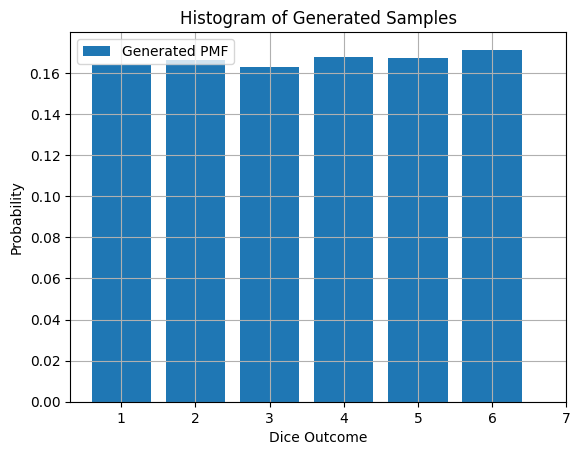

In [28]:

hist, bins = np.histogram(samples, bins=range(1, 8), density=True)

# Plot the histogram
plt.bar(bins[:-1], hist,align='center', label='Generated PMF')
plt.xlabel('Dice Outcome')
plt.ylabel('Probability')
plt.title('Histogram of Generated Samples')
plt.xticks(bins)
plt.grid()
plt.legend()
plt.show()

- All the bars have same height approximately 
- height of the bars is close to 0.1666 or 1\6

### Q6 Monte-Carlo 
- Source :https://www.tweag.io/blog/2019-10-25-mcmc-intro1/

Estimated Mean: 2.883198873708632
Estimated Variance: 2.132144367660204


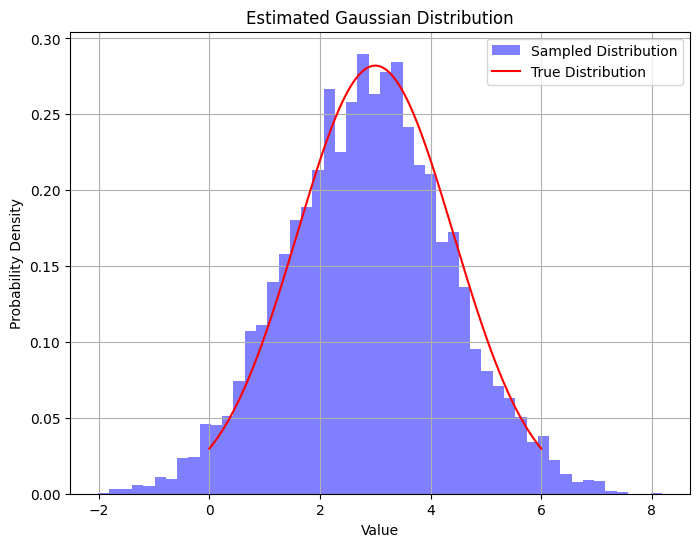

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt

target_mean = 3.0
target_variance = 2.0
target_distribution = lambda x: (1 / (np.sqrt(2 * np.pi * target_variance))) * np.exp(-(x - target_mean)**2 / (2 * target_variance))

proposal_variance = 1.0

current_state = 0.0
num_samples = 10000
samples = []
burn_in = 1000  
trace_mean = []
trace_variance = []

for t in range(num_samples + burn_in):
    # Sample from the proposal distribution (a Gaussian centered at current_state)
    proposal = np.random.normal(current_state, np.sqrt(proposal_variance))

    # Calculate the acceptance ratio
    acceptance_ratio = min(1, target_distribution(proposal) / target_distribution(current_state))

    # Accept or reject the proposal
    if random.random() < acceptance_ratio:
        current_state = proposal

    # Store samples after burn-in
    if t >= burn_in:
        samples.append(current_state)
        trace_mean.append(np.mean(samples))
        trace_variance.append(np.var(samples))

estimated_mean = np.mean(samples)
estimated_variance = np.var(samples)

print("Estimated Mean:", estimated_mean)
print("Estimated Variance:", estimated_variance)


# Plot the histogram of the final samples
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='b', label="Sampled Distribution")
x = np.linspace(0, 6, 1000)
plt.plot(x, target_distribution(x), 'r', label="True Distribution")
plt.title("Estimated Gaussian Distribution")
plt.xlabel("Value")
plt.grid()
plt.ylabel("Probability Density")
plt.legend()
plt.show()
